In [ ]:
import seaborn
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stroke/strokeprimary.csv')

In [ ]:
df

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Veggies,HvyAlcoholConsump,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke
0,1,0,32,61.0,57,0,0,1,0,0,...,0,0,0,5.68,0,1,0,0,1,0
1,2,0,60,60.0,59,1,0,1,0,0,...,1,0,1,20.00,1,1,0,0,1,0
2,3,1,65,65.0,63,1,0,0,1,1,...,1,0,0,6.30,0,1,0,0,1,1
3,4,1,70,65.0,65,1,2,1,1,1,...,1,0,1,15.60,1,1,1,1,1,1
4,5,1,62,60.0,59,1,1,0,0,1,...,1,0,1,10.00,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,60.0,50,1,0,1,0,1,...,1,0,0,5.80,1,1,0,0,0,1
332,333,1,60,62.0,61,1,0,1,1,1,...,1,0,0,6.80,0,1,1,1,1,0
333,334,1,70,60.0,74,1,0,1,1,1,...,1,0,0,6.20,1,1,1,1,1,0
334,335,1,53,62.0,78,1,2,1,0,1,...,1,0,0,5.40,1,1,1,1,1,0


In [ ]:
'''from sklearn.cluster import KMeans

# Initialize the K-Means model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to your data
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
df['Cluster'] = cluster_labels
'''

"from sklearn.cluster import KMeans\n\n# Initialize the K-Means model with the desired number of clusters\nkmeans = KMeans(n_clusters=3)\n\n# Fit the model to your data\nkmeans.fit(df)\n\n# Get cluster labels\ncluster_labels = kmeans.labels_\n\n# Add cluster labels to your DataFrame\ndf['Cluster'] = cluster_labels\n"

In [ ]:
df

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Veggies,HvyAlcoholConsump,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke
0,1,0,32,61.0,57,0,0,1,0,0,...,0,0,0,5.68,0,1,0,0,1,0
1,2,0,60,60.0,59,1,0,1,0,0,...,1,0,1,20.00,1,1,0,0,1,0
2,3,1,65,65.0,63,1,0,0,1,1,...,1,0,0,6.30,0,1,0,0,1,1
3,4,1,70,65.0,65,1,2,1,1,1,...,1,0,1,15.60,1,1,1,1,1,1
4,5,1,62,60.0,59,1,1,0,0,1,...,1,0,1,10.00,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,60.0,50,1,0,1,0,1,...,1,0,0,5.80,1,1,0,0,0,1
332,333,1,60,62.0,61,1,0,1,1,1,...,1,0,0,6.80,0,1,1,1,1,0
333,334,1,70,60.0,74,1,0,1,1,1,...,1,0,0,6.20,1,1,1,1,1,0
334,335,1,53,62.0,78,1,2,1,0,1,...,1,0,0,5.40,1,1,1,1,1,0


In [ ]:
# Define the conversion function
def inches_to_meter(inches):
    return inches / 39.37

# Apply the conversion function to the 'length_in_cm' column and store it in a new column
df['height'] = df['height'].apply(inches_to_meter)

# Save the converted data to a new CSV file
df.to_csv('converted_data.csv', index=False)

In [ ]:
df

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Veggies,HvyAlcoholConsump,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,0,0,5.68,0,1,0,0,1,0
1,2,0,60,1.524003,59,1,0,1,0,0,...,1,0,1,20.00,1,1,0,0,1,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,1,0,0,6.30,0,1,0,0,1,1
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,0,1,15.60,1,1,1,1,1,1
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,0,1,10.00,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,1,0,0,5.80,1,1,0,0,0,1
332,333,1,60,1.574803,61,1,0,1,1,1,...,1,0,0,6.80,0,1,1,1,1,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,1,0,0,6.20,1,1,1,1,1,0
334,335,1,53,1.574803,78,1,2,1,0,1,...,1,0,0,5.40,1,1,1,1,1,0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

In [ ]:
df['BMI'] = df['Weight'] / (df['height'])**2

In [ ]:
df

In [ ]:
#dfine a new categorical feature that determines obesity

df['obese'] = np.where(df['BMI'] >=30, 1,0)

In [ ]:
df

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
1,2,0,60,1.524003,59,1,0,1,0,0,...,1,20.00,1,1,0,0,1,0,25.402727,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


<ipython-input-14-34fb7a487b89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-14-34fb7a487b89>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])
<ipython-input-14-34fb7a487b89>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in 

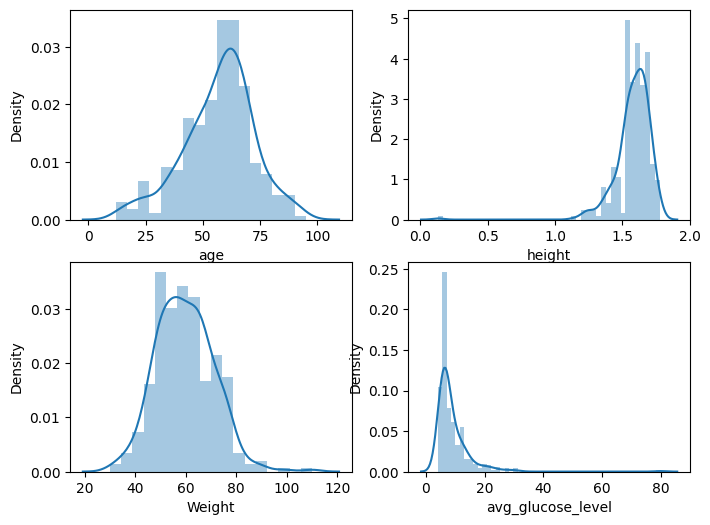

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(df['age'])

plt.subplot(2,2,2)
sns.distplot(df['height'])

plt.subplot(2,2,3)
sns.distplot(df['Weight'])

plt.subplot(2,2,4)
sns.distplot(df['avg_glucose_level'])

plt.savefig('Outlier_Obj_displot.jpg', dpi=300)
plt.show()

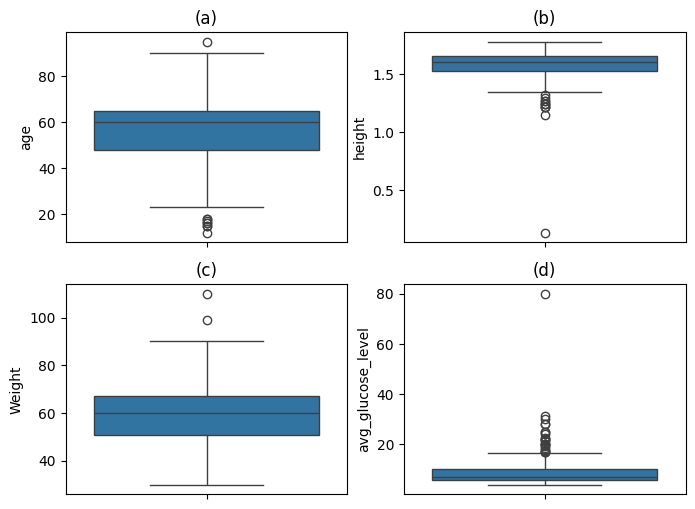

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.boxplot(df['age'])
plt.title('(a)')
plt.subplot(2,2,2)
sns.boxplot(df['height'])
plt.title('(b)')
plt.subplot(2,2,3)
sns.boxplot(df['Weight'])
plt.title('(c)')
plt.subplot(2,2,4)
sns.boxplot(df['avg_glucose_level'])
plt.title('(d)')

plt.savefig('Outlier_Obj.jpg', dpi=300)
plt.show()

#Outlier Detection

#Height

In [ ]:
# Finding the IQR
percentile25 = df['height'].quantile(0.25)
percentile75 = df['height'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

df[df['height'] > upper_limit]
df[df['height'] < lower_limit]

Upper limit 1.841503683007366
Lower limit 1.3335026670053343


,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
73,74,0,68,1.219202,58,1,0,1,0,1,...,1,11.4,1,1,1,1,1,0,39.019019,1
102,103,0,45,0.134620,68,1,0,1,0,1,...,1,12.6,0,1,0,0,0,1,3752.217487,1
161,162,0,65,1.219202,35,1,0,1,0,0,...,1,28.0,0,1,1,1,1,1,23.545960,0
164,165,1,18,1.320803,48,0,0,1,0,0,...,0,5.0,0,0,1,1,1,0,27.514738,0
165,166,1,95,1.270003,50,1,0,1,0,1,...,0,5.0,0,1,1,1,1,1,30.999938,1
167,168,0,65,1.219202,60,1,0,1,0,1,...,0,5.0,1,1,1,1,1,1,40.364503,1
185,186,0,45,1.143002,46,1,0,1,0,1,...,0,6.4,1,0,0,0,0,1,35.209806,1
199,200,0,65,1.244602,40,1,0,1,0,1,...,0,6.7,1,1,1,1,1,0,25.822522,0
200,201,0,38,1.295403,69,1,1,1,0,1,...,0,5.8,0,1,0,0,0,1,41.118718,1
222,223,0,65,1.244602,50,1,0,1,0,1,...,1,25.0,1,0,1,1,1,1,32.278153,1


In [ ]:
new_df = df[df['height'] > lower_limit]

<ipython-input-18-c37cb3dabdf5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])
<ipython-input-18-c37cb3dabdf5>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['height'])


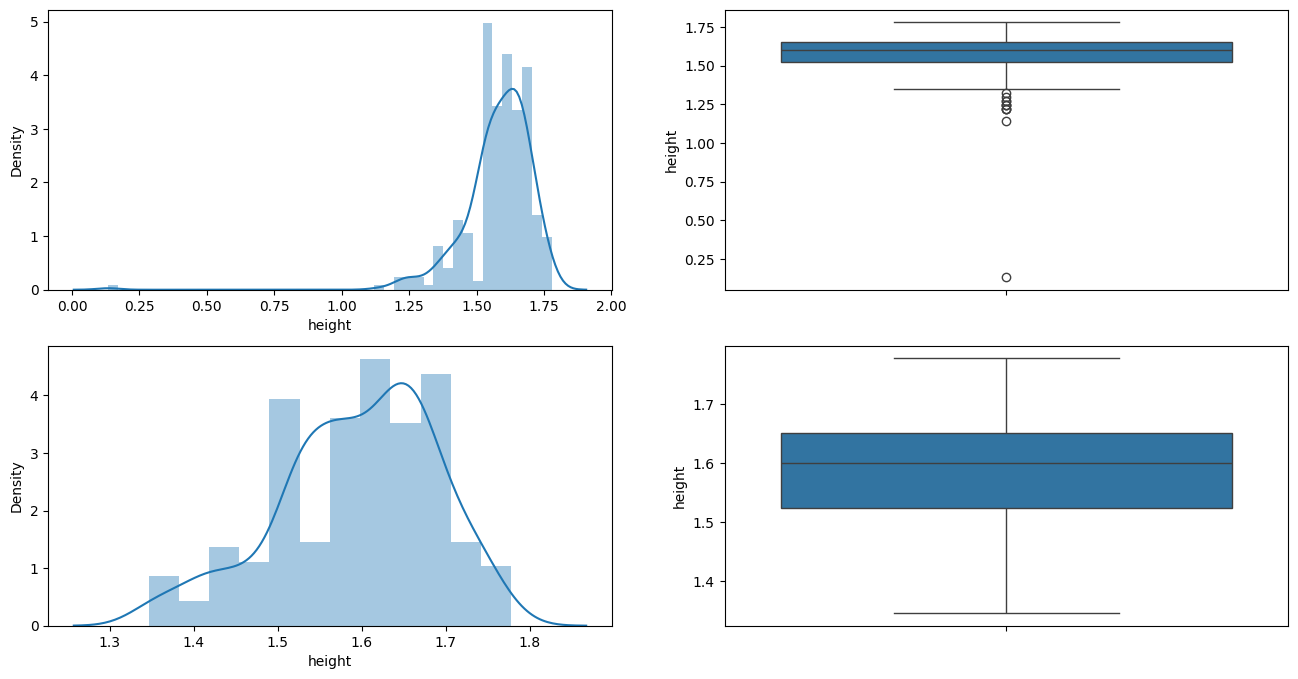

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['height'])

plt.subplot(2,2,2)
sns.boxplot(df['height'])

plt.subplot(2,2,3)
sns.distplot(new_df['height'])

plt.subplot(2,2,4)
sns.boxplot(new_df['height'])

plt.show()

<ipython-input-19-7447fc0faafc>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])
<ipython-input-19-7447fc0faafc>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['height'])


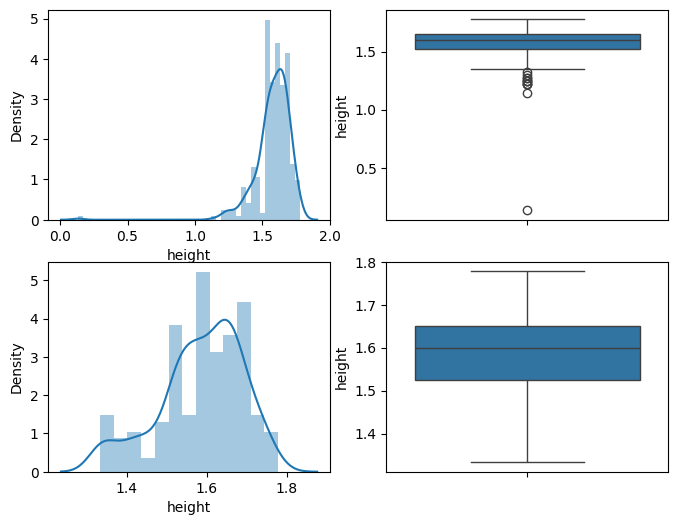

In [ ]:
new_df_cap = df.copy()

new_df_cap['height'] = np.where(
    new_df_cap['height'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['height'] < lower_limit,
        lower_limit,
        new_df_cap['height']
    )
)



# Comparing

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(df['height'])

plt.subplot(2,2,2)
sns.boxplot(df['height'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['height'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['height'])

plt.savefig('Outlier_height.jpg', dpi=300)
plt.show()

In [ ]:
new_df

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
1,2,0,60,1.524003,59,1,0,1,0,0,...,1,20.00,1,1,0,0,1,0,25.402727,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


#avg_glucose_level

In [ ]:
# Finding the IQR
percentile26 = new_df['avg_glucose_level'].quantile(0.25)
percentile76 = new_df['avg_glucose_level'].quantile(0.75)

iqr = percentile76 - percentile26

upper_limit = percentile76 + 1.5 * iqr
lower_limit = percentile26 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)




Upper limit 16.65
Lower limit -0.549999999999998


In [ ]:
new_df[new_df['avg_glucose_level'] > upper_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
1,2,0,60,1.524003,59,1,0,1,0,0,...,1,20.00,1,1,0,0,1,0,25.402727,0
16,17,0,60,1.549403,66,1,0,0,0,0,...,1,20.00,0,1,0,0,1,0,27.492555,0
25,26,1,70,1.625603,45,1,0,0,0,0,...,1,22.00,1,0,1,1,1,1,17.028775,0
51,52,1,55,1.752604,67,1,1,1,1,1,...,1,21.20,1,1,1,1,1,0,21.812601,0
84,85,0,55,1.422403,52,1,0,0,0,1,...,1,22.00,1,1,0,0,1,0,25.701479,0
88,89,1,70,1.574803,66,1,1,1,1,1,...,1,20.10,0,1,0,0,0,0,26.612850,0
89,90,0,50,1.524003,59,1,0,1,0,1,...,1,19.50,0,1,1,1,1,0,25.402727,0
91,92,1,17,1.676403,67,0,0,0,0,1,...,1,22.50,0,1,0,0,0,0,23.840632,0
92,93,0,45,1.574803,57,1,0,0,0,1,...,1,17.70,1,0,0,0,0,0,22.983825,0
108,109,0,65,1.524003,50,1,0,1,0,0,...,1,18.70,1,1,1,1,1,0,21.527735,0


In [ ]:
new_df[new_df['avg_glucose_level'] < lower_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese


<ipython-input-24-020d0b9c920c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['avg_glucose_level'])
<ipython-input-24-020d0b9c920c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['avg_glucose_level'])


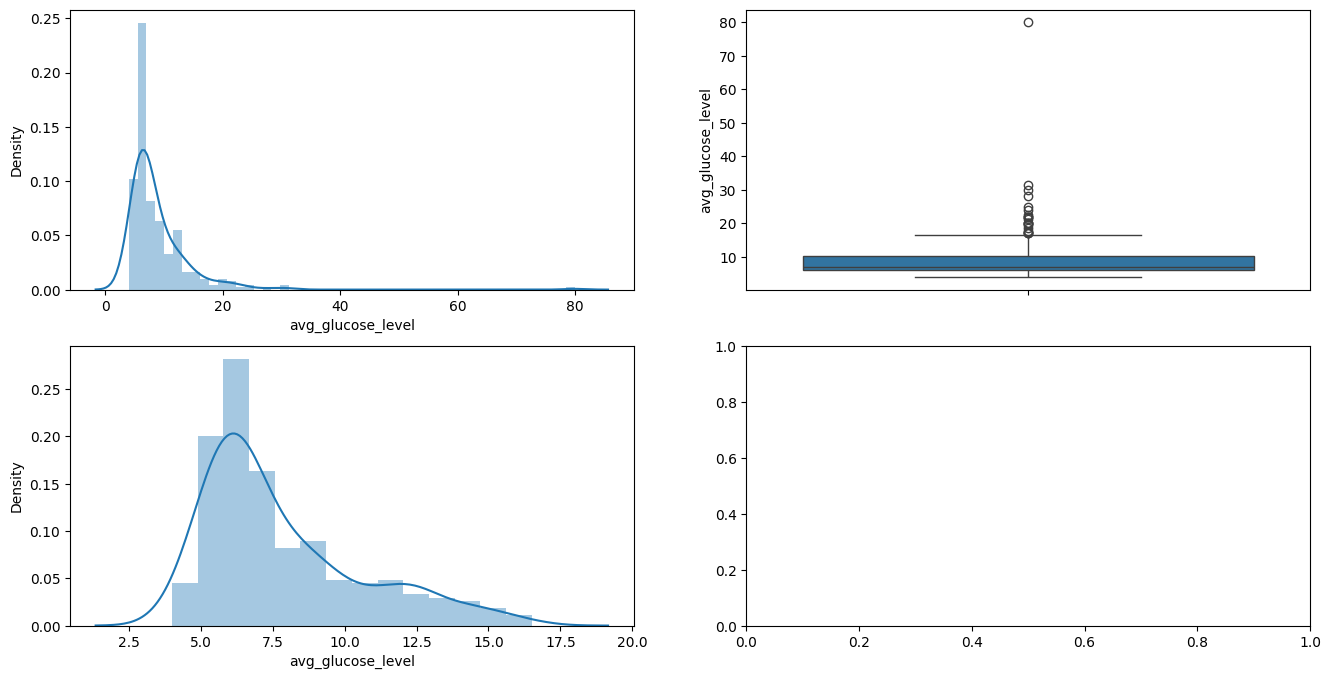

In [ ]:
new_df1 = new_df[new_df['avg_glucose_level'] < upper_limit]

# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(new_df['avg_glucose_level'])

plt.subplot(2,2,3)
sns.distplot(new_df1['avg_glucose_level'])

plt.subplot(2,2,4)
'''sns.boxplot(new_df1['avg_glucose_level'])
'''
plt.show()


<ipython-input-25-3989b5f37f19>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['avg_glucose_level'])
<ipython-input-25-3989b5f37f19>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1_cap['avg_glucose_level'])


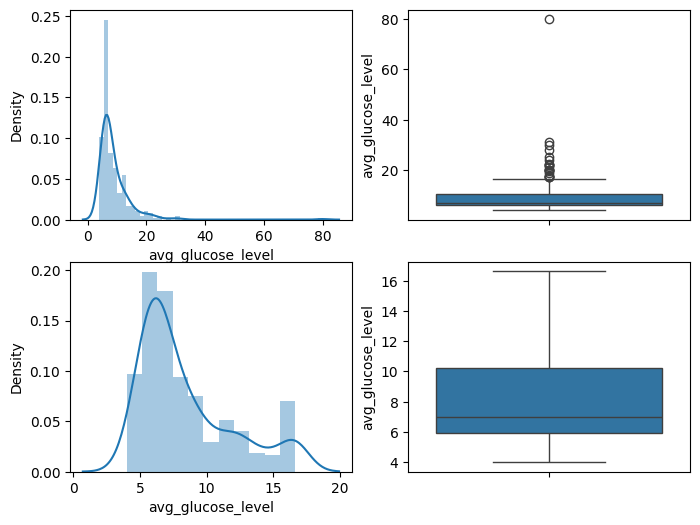

In [ ]:
new_df1_cap = new_df.copy()

new_df1_cap['avg_glucose_level'] = np.where(
    new_df1_cap['avg_glucose_level'] > upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['avg_glucose_level'] < lower_limit,
        lower_limit,
        new_df1_cap['avg_glucose_level']
    )
)

# Comparing

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(new_df['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(new_df['avg_glucose_level'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['avg_glucose_level'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['avg_glucose_level'])

plt.savefig('Outlier_avg_glucose.jpg', dpi=300)
plt.show()

In [ ]:
new_df1

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
5,6,0,52,1.422403,84,1,0,1,0,1,...,1,9.40,1,1,0,0,0,1,41.517774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


#weight


In [ ]:
# Finding the IQR
percentile27 = new_df1['Weight'].quantile(0.25)
percentile77 = new_df1['Weight'].quantile(0.75)

iqr = percentile77 - percentile27

upper_limit = percentile77 + 1.5 * iqr
lower_limit = percentile27 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 90.625
Lower limit 27.625


In [ ]:

new_df1[new_df1['Weight'] > upper_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
173,174,1,55,1.676403,110,1,0,1,1,1,...,0,5.0,0,1,1,1,1,1,39.141336,1
311,312,1,24,1.778004,99,0,1,0,1,1,...,0,4.3,1,1,1,1,1,0,31.316264,1


In [ ]:
new_df1[new_df1['Weight'] < lower_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese


In [ ]:
new_df2 = new_df1[new_df1['Weight'] < upper_limit]

<ipython-input-31-7be992abbf32>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['Weight'])
<ipython-input-31-7be992abbf32>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2_cap['Weight'])


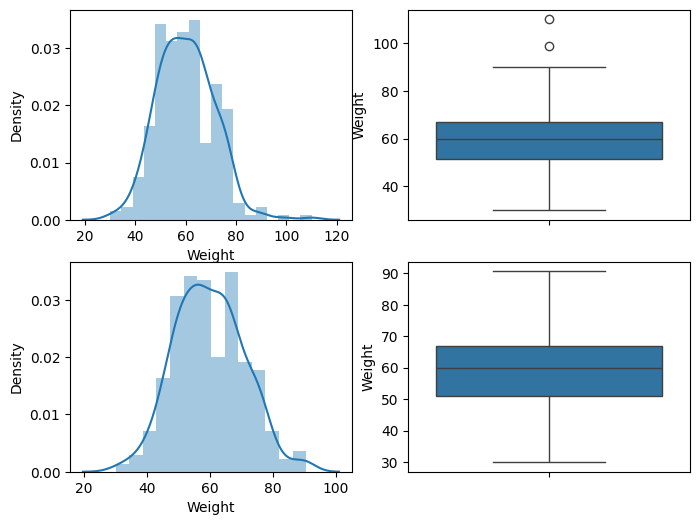

In [ ]:
new_df2_cap = new_df.copy()

new_df2_cap['Weight'] = np.where(
    new_df2_cap['Weight'] > upper_limit,
    upper_limit,
    np.where(
        new_df2_cap['Weight'] < lower_limit,
        lower_limit,
        new_df2_cap['Weight']
    )
)

# Comparing

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(new_df1['Weight'])

plt.subplot(2,2,2)
sns.boxplot(new_df1['Weight'])

plt.subplot(2,2,3)
sns.distplot(new_df2_cap['Weight'])

plt.subplot(2,2,4)
sns.boxplot(new_df2_cap['Weight'])
plt.savefig('Outlier_weight.jpg', dpi=300)
plt.show()

In [ ]:
new_df2

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
5,6,0,52,1.422403,84,1,0,1,0,1,...,1,9.40,1,1,0,0,0,1,41.517774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


#BMI

In [ ]:
# Finding the IQR
percentile28 = new_df2['BMI'].quantile(0.25)
percentile78 = new_df2['BMI'].quantile(0.75)

iqr = percentile78 - percentile28

upper_limit = percentile78 + 1.5 * iqr
lower_limit = percentile28 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 33.40334840996687
Lower limit 13.25870560245737


In [ ]:
new_df2[new_df2['BMI'] > upper_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
5,6,0,52,1.422403,84,1,0,1,0,1,...,1,9.40,1,1,0,0,0,1,41.517774,1
169,170,1,50,1.371603,65,1,0,1,0,1,...,0,5.00,0,1,0,0,1,0,34.550685,1
170,171,1,65,1.422403,75,1,1,1,1,0,...,0,6.20,0,1,1,1,1,0,37.069441,1
171,172,1,50,1.397003,70,1,0,1,0,1,...,1,12.21,0,1,1,1,0,0,35.867697,1
189,190,0,40,1.524003,88,1,1,1,0,1,...,0,6.00,1,1,1,1,1,1,37.888813,1
306,307,0,50,1.422403,75,1,1,1,0,1,...,1,7.40,1,1,0,0,1,1,37.069441,1


In [ ]:
new_df2[new_df2['BMI'] < lower_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
105,106,0,12,1.574803,30,0,0,1,0,1,...,0,5.6,0,0,0,0,0,1,12.09675,0


In [ ]:
new_df3 = new_df2[new_df2['BMI'] < upper_limit]

<ipython-input-37-03f6c5101564>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['BMI'])
<ipython-input-37-03f6c5101564>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3_cap['BMI'])


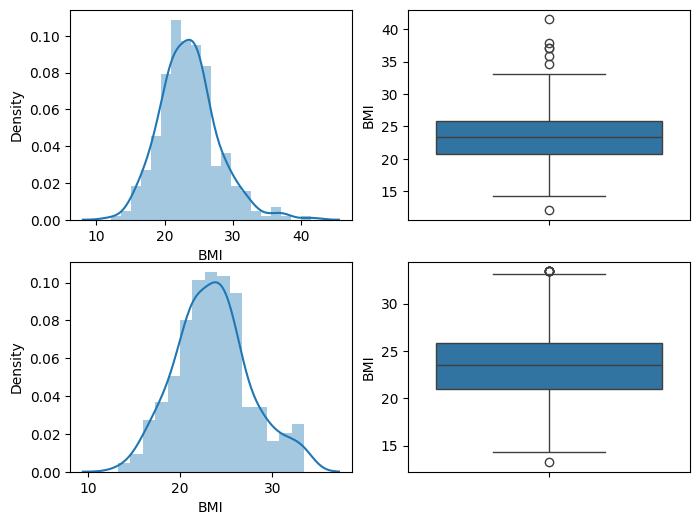

In [ ]:
new_df3_cap = new_df.copy()

new_df3_cap['BMI'] = np.where(
    new_df3_cap['BMI'] > upper_limit,
    upper_limit,
    np.where(
        new_df3_cap['BMI'] < lower_limit,
        lower_limit,
        new_df3_cap['BMI']
    )
)

# Comparing

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(new_df2['BMI'])

plt.subplot(2,2,2)
sns.boxplot(new_df2['BMI'])

plt.subplot(2,2,3)
sns.distplot(new_df3_cap['BMI'])

plt.subplot(2,2,4)
sns.boxplot(new_df3_cap['BMI'])
plt.savefig('Outlier_BMI.jpg', dpi=300)
plt.show()

In [ ]:
new_df3

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
6,7,1,50,1.651003,66,1,0,0,1,1,...,0,6.70,1,1,0,0,1,1,24.212969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


#Age

In [ ]:
# Finding the IQR
percentile29 = new_df3['age'].quantile(0.25)
percentile79 = new_df3['age'].quantile(0.75)

iqr = percentile79 - percentile29

upper_limit = percentile79 + 1.5 * iqr
lower_limit = percentile29 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 90.0
Lower limit 26.0


In [ ]:
new_df3[new_df3['age'] > upper_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese


In [ ]:
new_df3[new_df3['age'] < lower_limit]

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
15,16,1,18,1.651003,61,0,0,1,0,1,...,0,7.50,1,1,1,1,1,0,22.378653,0
22,23,1,16,1.651003,50,0,0,0,0,1,...,0,6.65,1,1,0,0,1,0,18.343159,0
105,106,0,12,1.574803,30,0,0,1,0,1,...,0,5.60,0,0,0,0,0,1,12.096750,0
148,149,0,15,1.473203,45,1,0,0,0,0,...,0,6.00,0,1,1,1,1,0,20.734203,0
218,219,0,15,1.625603,45,0,1,1,0,1,...,1,5.90,0,1,0,0,1,0,17.028775,0
282,283,1,16,1.625603,40,0,1,1,0,1,...,0,6.00,0,1,0,0,0,1,15.136688,0
296,297,0,25,1.473203,62,1,0,1,0,1,...,0,5.00,0,1,1,1,1,0,28.567125,0
297,298,0,25,1.524003,58,1,0,1,0,1,...,0,7.00,0,1,0,0,1,0,24.972172,0
310,311,1,24,1.752604,73,1,1,1,0,0,...,0,6.20,0,1,0,0,0,1,23.765968,0
312,313,0,25,1.422403,62,1,0,1,0,1,...,0,8.00,0,1,0,0,1,1,30.644071,1


In [ ]:
new_df4 = new_df3[new_df3['age'] > lower_limit]

<ipython-input-43-8dadaf311d55>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['age'])
<ipython-input-43-8dadaf311d55>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df4_cap['age'])


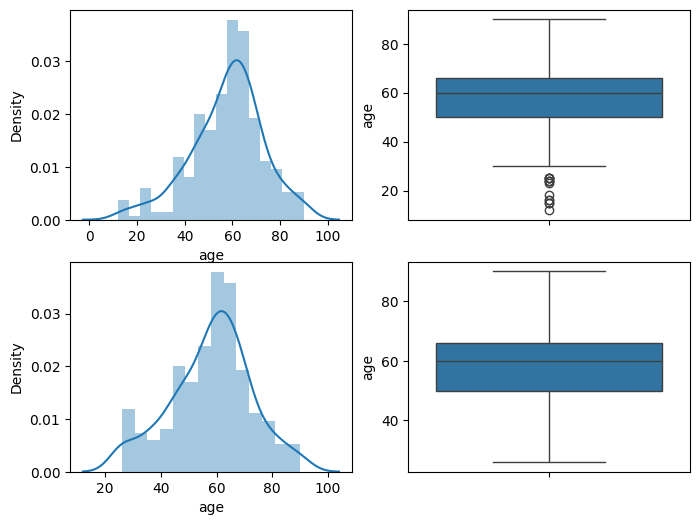

In [ ]:
new_df4_cap = new_df3.copy()

new_df4_cap['age'] = np.where(
    new_df4_cap['age'] > upper_limit,
    upper_limit,
    np.where(
        new_df4_cap['age'] < lower_limit,
        lower_limit,
        new_df4_cap['age']
    )
)

# Comparing

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(new_df3['age'])

plt.subplot(2,2,2)
sns.boxplot(new_df3['age'])

plt.subplot(2,2,3)
sns.distplot(new_df4_cap['age'])

plt.subplot(2,2,4)
sns.boxplot(new_df4_cap['age'])
plt.savefig('Outlier_age.jpg', dpi=300)
plt.show()

In [ ]:
new_df4

,id_no,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,...,Diabetes,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,heart_disease,stroke,BMI,obese
0,1,0,32,1.549403,57,0,0,1,0,0,...,0,5.68,0,1,0,0,1,0,23.743570,0
2,3,1,65,1.651003,63,1,0,0,1,1,...,0,6.30,0,1,0,0,1,1,23.112380,0
3,4,1,70,1.651003,65,1,2,1,1,1,...,1,15.60,1,1,1,1,1,1,23.846106,0
4,5,1,62,1.524003,59,1,1,0,0,1,...,1,10.00,1,1,0,0,1,0,25.402727,0
6,7,1,50,1.651003,66,1,0,0,1,1,...,0,6.70,1,1,0,0,1,1,24.212969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,57,1.524003,50,1,0,1,0,1,...,0,5.80,1,1,0,0,0,1,21.527735,0
332,333,1,60,1.574803,61,1,0,1,1,1,...,0,6.80,0,1,1,1,1,0,24.596725,0
333,334,1,70,1.524003,74,1,0,1,1,1,...,0,6.20,1,1,1,1,1,0,31.861047,1
334,335,1,53,1.574803,78,1,2,1,0,1,...,0,5.40,1,1,1,1,1,0,31.451550,1


#clusturing

In [ ]:
'''from sklearn.cluster import KMeans

# Initialize the K-Means model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to your data
kmeans.fit(new_df4)'''


'from sklearn.cluster import KMeans\n\n# Initialize the K-Means model with the desired number of clusters\nkmeans = KMeans(n_clusters=3)\n\n# Fit the model to your data\nkmeans.fit(new_df4)'

In [ ]:
'''# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
new_df4['Cluster'] = cluster_labels'''


"# Get cluster labels\ncluster_labels = kmeans.labels_\n\n# Add cluster labels to your DataFrame\nnew_df4['Cluster'] = cluster_labels"

In [ ]:
df['HighBP'].value_counts()

1    216
0    120
Name: HighBP, dtype: int64

In [ ]:
df['stroke'].value_counts()

1    175
0    161
Name: stroke, dtype: int64

In [ ]:
import seaborn as sb

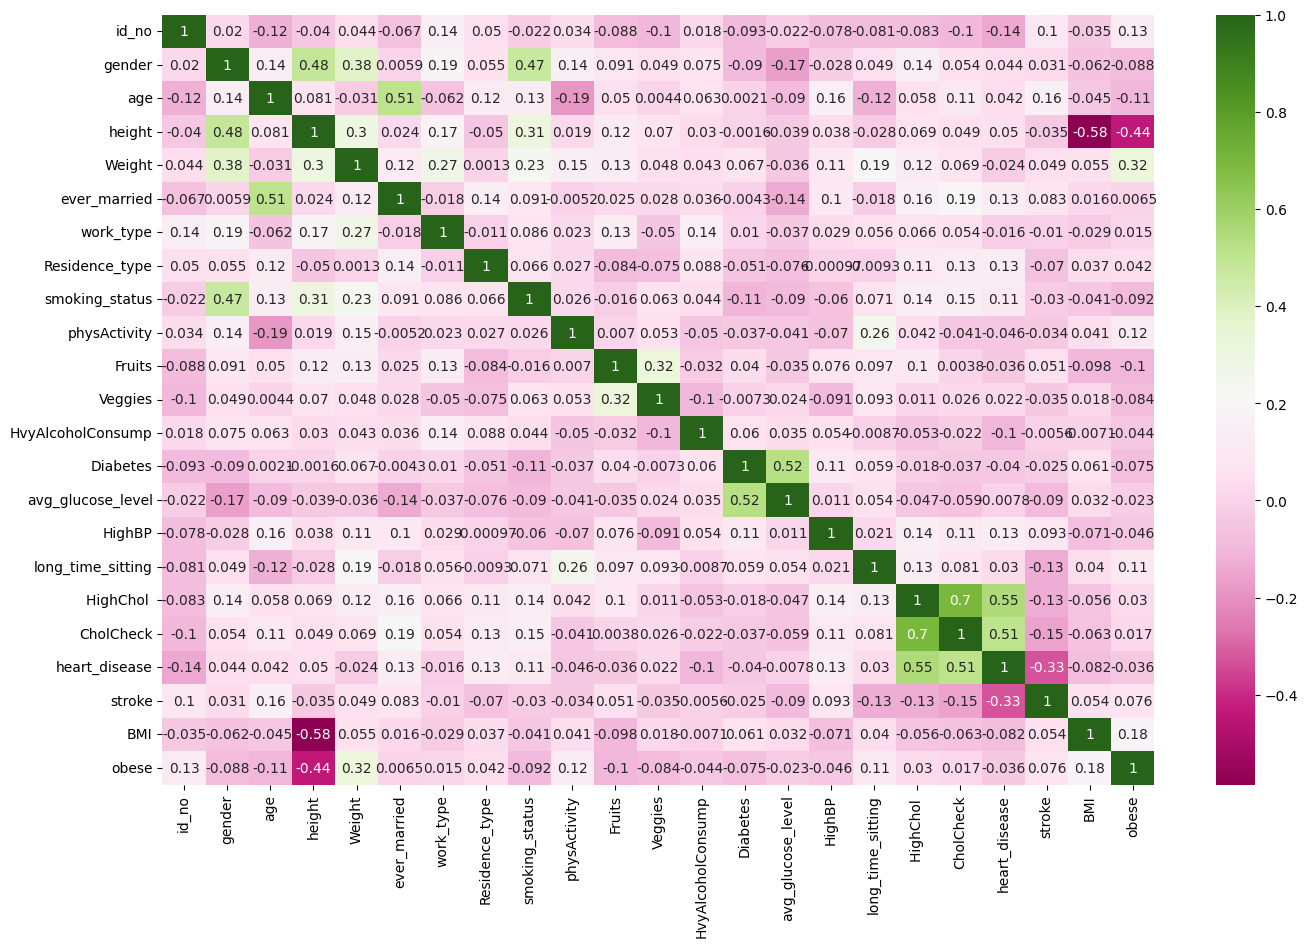

In [ ]:
plt.figure(figsize=(16, 10))
dataplot = sb.heatmap(df.corr(), cmap="PiYG", annot=True)
plt.savefig('Correlation.jpg', dpi=300)

In [ ]:
new_df4=new_df4.drop(['id_no'], axis=1)

In [ ]:
new_df4=new_df4.drop(['Diabetes'],axis=1)

In [ ]:
new_df4=new_df4.drop(['heart_disease'],axis=1)

In [ ]:
X = new_df4.drop(['stroke'],axis=1)

In [ ]:
y= new_df4['stroke']

In [ ]:

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
'''from sklearn.preprocessing import RobustScaler
from sklearn import metrics

scaler = RobustScaler()

X_train[num_list]= scaler.fit_transform(X_train[num_list])
X_test[num_list] = scaler.transform(X_test[num_list])'''

'from sklearn.preprocessing import RobustScaler\nfrom sklearn import metrics\n\nscaler = RobustScaler()\n\nX_train[num_list]= scaler.fit_transform(X_train[num_list])\nX_test[num_list] = scaler.transform(X_test[num_list])'

In [ ]:
X_train.shape

(224, 19)

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler
ss= MaxAbsScaler ()
X_train= ss.fit_transform(X_train)'''

'from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler\nss= MaxAbsScaler ()\nX_train= ss.fit_transform(X_train)'

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler
ss= MaxAbsScaler ()
X_test= ss.fit_transform(X_test)'''


'from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler\nss= MaxAbsScaler ()\nX_test= ss.fit_transform(X_test)'

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#1. Nayeb Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb.score(X_test, y_test)

0.5178571428571429

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(gnb, X, y, cv=5)
cvs


array([0.44642857, 0.42857143, 0.53571429, 0.64285714, 0.60714286])

In [ ]:
cvs.mean()


0.5321428571428571

In [ ]:
cvs.std()

0.08481672919312798

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= gnb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        22
           1       0.62      0.53      0.57        34

    accuracy                           0.52        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.54      0.52      0.52        56

0.5178571428571429
0.5294117647058824
0.028277634961439535


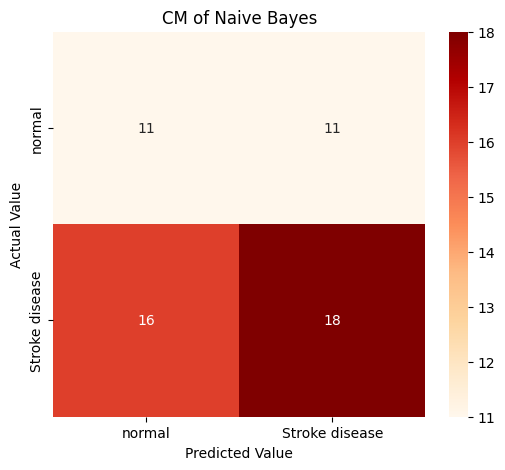

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of Naive Bayes')
plt.savefig('NB-2.jpg', dpi=300)
plt.show()

#2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=100, gamma=0.00001, kernel="rbf", random_state=42)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6071428571428571

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(svm, X, y, cv=5)
cvs


array([0.53571429, 0.51785714, 0.57142857, 0.53571429, 0.51785714])

In [ ]:
cvs.mean()


0.5357142857142857

In [ ]:
cvs.std()

0.01956151991089876

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= svm.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.61      1.00      0.76        34

    accuracy                           0.61        56
   macro avg       0.30      0.50      0.38        56
weighted avg       0.37      0.61      0.46        56

0.6071428571428571
1.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


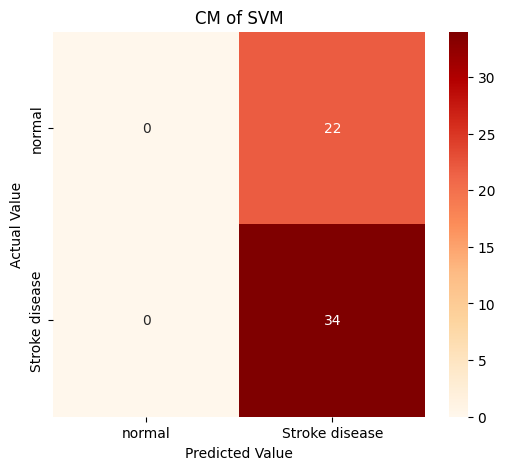

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of SVM')
plt.savefig('SVM-2.jpg', dpi=300)
plt.show()

#3. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=5,
                             min_samples_split=2, criterion='entropy', max_features='sqrt')
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.4642857142857143

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(dtc, X, y, cv=5)
cvs


array([0.57142857, 0.46428571, 0.46428571, 0.55357143, 0.5       ])

In [ ]:
cvs.mean()


0.5107142857142858

In [ ]:
cvs.std()

0.04460712855998855

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= dtc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.37      0.50      0.42        22
           1       0.58      0.44      0.50        34

    accuracy                           0.46        56
   macro avg       0.47      0.47      0.46        56
weighted avg       0.49      0.46      0.47        56

0.4642857142857143
0.4411764705882353
-0.055276381909547645


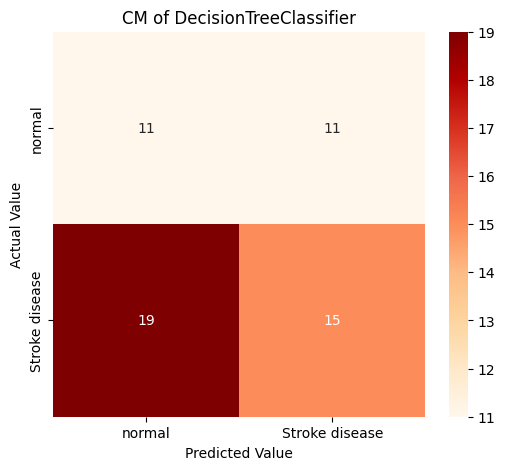

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of DecisionTreeClassifier')
plt.savefig('DTC-2.jpg', dpi=300)
plt.show()

#4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.5714285714285714

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(lr, X, y, cv=5)
cvs


array([0.44642857, 0.41071429, 0.57142857, 0.64285714, 0.55357143])

In [ ]:
cvs.mean()


0.525

In [ ]:
cvs.std()

0.08496698038121657

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= lr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        22
           1       0.67      0.59      0.62        34

    accuracy                           0.57        56
   macro avg       0.56      0.57      0.56        56
weighted avg       0.59      0.57      0.58        56

0.5714285714285714
0.5882352941176471
0.1295336787564767


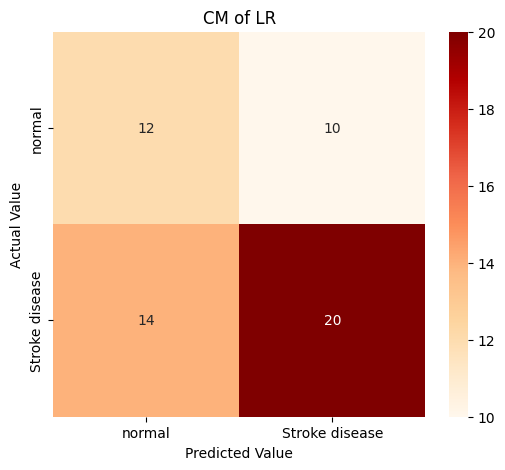

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of LR')
plt.savefig('LR-2.jpg', dpi=300)
plt.show()

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


#5. CatBoost

In [ ]:
from catboost import CatBoostClassifier
cbc= CatBoostClassifier(iterations=5)
cbc.fit(X_train, y_train)

cbc.score(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.6578257	total: 48.1ms	remaining: 192ms
1:	learn: 0.6278580	total: 49.9ms	remaining: 74.8ms
2:	learn: 0.6072888	total: 51.3ms	remaining: 34.2ms
3:	learn: 0.5878057	total: 53.1ms	remaining: 13.3ms
4:	learn: 0.5652504	total: 54.5ms	remaining: 0us


0.8080357142857143

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(cbc, X, y, cv=5)
cvs


Learning rate set to 0.5
0:	learn: 0.6468229	total: 1.16ms	remaining: 4.65ms
1:	learn: 0.6145148	total: 2.36ms	remaining: 3.54ms
2:	learn: 0.6001584	total: 4.05ms	remaining: 2.7ms
3:	learn: 0.5853951	total: 5.66ms	remaining: 1.41ms
4:	learn: 0.5611712	total: 7.48ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6675373	total: 1.19ms	remaining: 4.75ms
1:	learn: 0.6372201	total: 1.85ms	remaining: 2.78ms
2:	learn: 0.6048670	total: 3.19ms	remaining: 2.12ms
3:	learn: 0.5961940	total: 4.64ms	remaining: 1.16ms
4:	learn: 0.5726406	total: 5.87ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6550469	total: 1.39ms	remaining: 5.57ms
1:	learn: 0.6280575	total: 2.95ms	remaining: 4.43ms
2:	learn: 0.5915259	total: 4.32ms	remaining: 2.88ms
3:	learn: 0.5731703	total: 5.4ms	remaining: 1.35ms
4:	learn: 0.5548859	total: 6.95ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6656512	total: 1.11ms	remaining: 4.43ms
1:	learn: 0.6389181	total: 2.19ms	remaining: 3.28ms
2:	learn: 0.6105189	total: 

array([0.48214286, 0.46428571, 0.58928571, 0.55357143, 0.55357143])

In [ ]:
cvs.mean()


0.5285714285714287

In [ ]:
cvs.std()

0.04738035414793428

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= cbc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34        22
           1       0.55      0.50      0.52        34

    accuracy                           0.45        56
   macro avg       0.43      0.43      0.43        56
weighted avg       0.46      0.45      0.45        56

0.44642857142857145
0.5
-0.1331592689295038


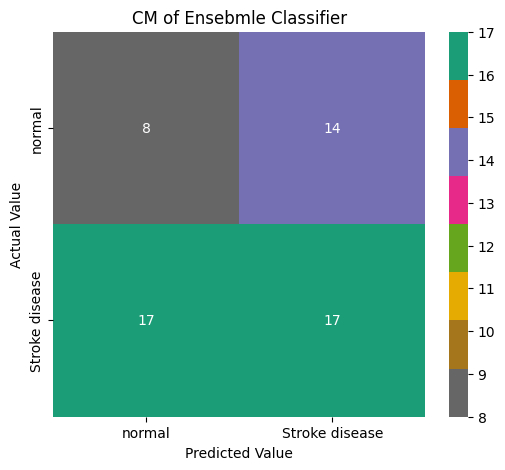

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Dark2_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of Ensebmle Classifier')
plt.savefig('Caw.jpg', dpi=300)
plt.show()

#6. AdaBoost

In [ ]:
ab = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
ab.fit(X_train, y_train)
ab.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.75

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(ab, X, y, cv=5)
cvs


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0.48214286, 0.41071429, 0.58928571, 0.57142857, 0.57142857])

In [ ]:
cvs.mean()


0.525

In [ ]:
cvs.std()

0.06832545167753211

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= ab.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36        22
           1       0.59      0.59      0.59        34

    accuracy                           0.50        56
   macro avg       0.48      0.48      0.48        56
weighted avg       0.50      0.50      0.50        56

0.5
0.5882352941176471
-0.048128342245989275


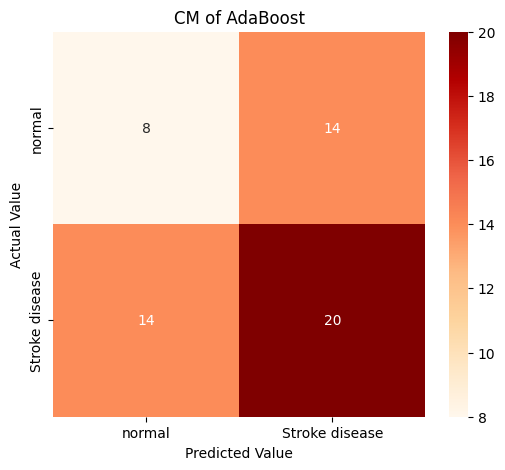

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of AdaBoost')
plt.savefig('AdaBoost-2', dpi=300)
plt.show()

#7. Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_leaf=1, subsample=0.8)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.5535714285714286

In [ ]:
pip install matplotlib seaborn


In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(gbm, X, y, cv=5)
cvs


array([0.39285714, 0.33928571, 0.53571429, 0.57142857, 0.55357143])

In [ ]:
cvs.mean()


0.47857142857142854

In [ ]:
cvs.std()

0.09408528480228207

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= gbm.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        22
           1       0.65      0.59      0.62        34

    accuracy                           0.55        56
   macro avg       0.54      0.54      0.54        56
weighted avg       0.56      0.55      0.56        56

0.5535714285714286
0.5882352941176471
0.08616187989556134


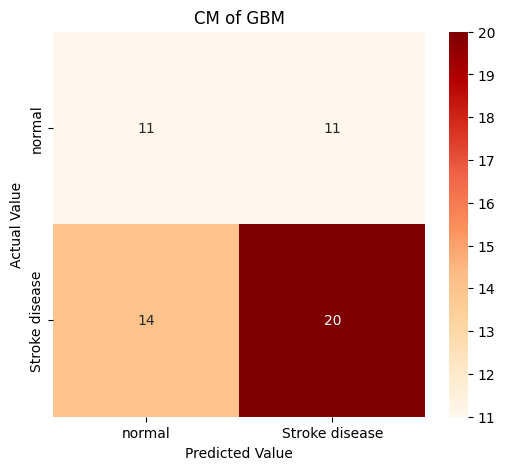

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of GBM')
plt.savefig('GBM-2.jpg', dpi=300)
plt.show()

#8. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=10, random_state=2, n_estimators=110)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.5892857142857143

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(rfc, X, y, cv=5)
cvs


array([0.375     , 0.42857143, 0.55357143, 0.64285714, 0.69642857])

In [ ]:
cvs.mean()


0.5392857142857143

In [ ]:
cvs.std()

0.1223702978500844

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53        22
           1       0.69      0.59      0.63        34

    accuracy                           0.59        56
   macro avg       0.59      0.59      0.58        56
weighted avg       0.61      0.59      0.59        56

0.5892857142857143
0.5882352941176471
0.17223650385604106


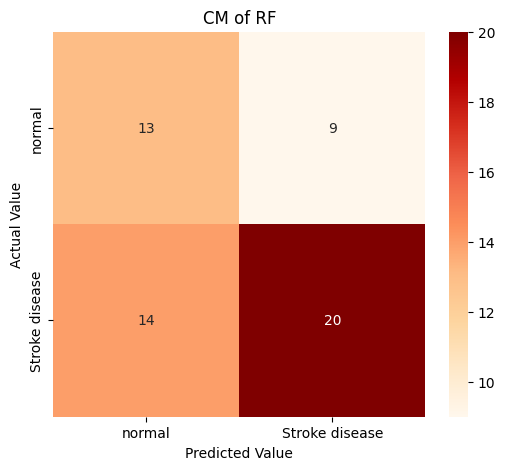

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of RF')
plt.savefig('RF-2.jpg', dpi=300)
plt.show()

#9. Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train,y_train)
mlp.score(X_test, y_test)

0.5535714285714286

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(mlp, X, y, cv=5)
cvs


array([0.48214286, 0.375     , 0.42857143, 0.625     , 0.57142857])

In [ ]:
cvs.mean()


0.49642857142857144

In [ ]:
cvs.std()

0.091333656089603

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        22
           1       0.63      0.65      0.64        34

    accuracy                           0.55        56
   macro avg       0.53      0.53      0.53        56
weighted avg       0.55      0.55      0.55        56

0.5535714285714286
0.6470588235294118
0.05660377358490565


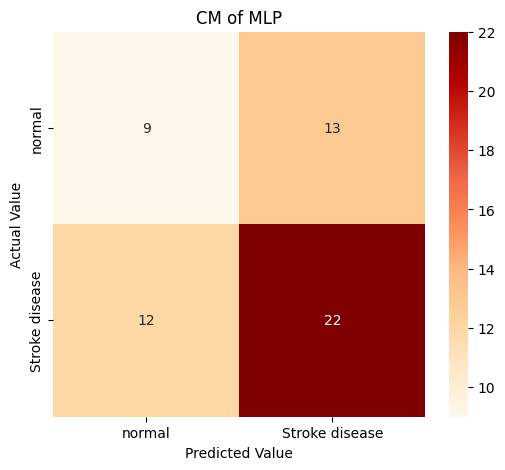

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of MLP')
plt.savefig('MLP-2.jpg', dpi=300)
plt.show()

#10. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier(verbosity=0, seed=42, n_estimators=140,
                            gamma= 0.16, max_depth=3, learning_rate=0.096,
                            reg_lambda=50.0, scale_pos_weight=1)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.5535714285714286

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(xgb, X, y, cv=5)
cvs


array([0.39285714, 0.39285714, 0.57142857, 0.57142857, 0.53571429])

In [ ]:
cvs.mean()


0.4928571428571429

In [ ]:
cvs.std()

0.08268454930564446

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= xgb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49        22
           1       0.66      0.56      0.60        34

    accuracy                           0.55        56
   macro avg       0.55      0.55      0.55        56
weighted avg       0.57      0.55      0.56        56

0.5535714285714286
0.5588235294117647
0.10025706940874035


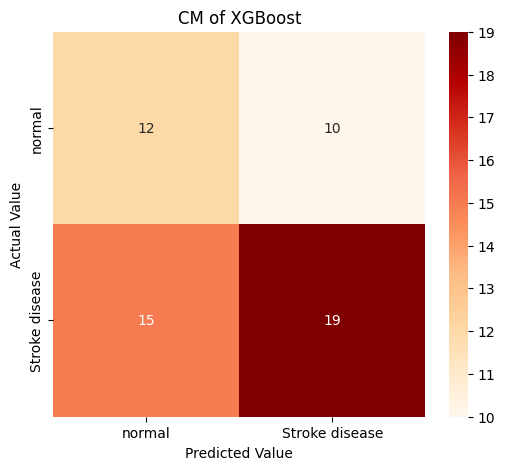

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of XGBoost')
plt.savefig('XGB-2.jpg', dpi=300)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(xgb, X, y, cv=5)
cvs


array([0.39285714, 0.39285714, 0.57142857, 0.57142857, 0.53571429])

In [ ]:
cvs.mean()


0.4928571428571429

In [ ]:
cvs.std()

0.08268454930564446

#11. Ensemble classifier

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

In [ ]:
'''# get models
# get a voting ensemble of models
# define the base models

models = list()
CatBoostClassifier
AdaBoostClassifier
rfc = Pipeline([('m', RandomForestClassifier())])
models.append(('randomforest', RandomForestClassifier))
svc = Pipeline([('m', SVC(probability=True))])
models.append(('svc', svc))
NB = Pipeline([('m', GaussianNB())])
models.append(('gnb', NB))
DT = Pipeline([('m', DecisionTreeClassifier())])
models.append(('dt', DT))'''



# get models
# get a voting ensemble of models
# define the base models

models = list()
NB = Pipeline([('m', MLPClassifier())])
models.append(('gnb', NB))
DT = Pipeline([('m', DecisionTreeClassifier())])
models.append(('dt', DT))
randomforest = Pipeline([('m', CatBoostClassifier())])
models.append(('randomforest', randomforest))
svc = Pipeline([('m', AdaBoostClassifier())])
models.append(('svc', svc))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')

'''# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')'''

"# define the voting ensemble\nensemble = VotingClassifier(estimators=models, voting='hard')"

In [ ]:
ensemble

VotingClassifier(estimators=[('gnb', Pipeline(steps=[('m', MLPClassifier())])),
                             ('dt',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier())])),
                             ('randomforest',
                              Pipeline(steps=[('m',
                                               <catboost.core.CatBoostClassifier object at 0x7b4da98d3700>)])),
                             ('svc',
                              Pipeline(steps=[('m', AdaBoostClassifier())]))],
                 voting='soft')

In [ ]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

Learning rate set to 0.005439
0:	learn: 0.6919527	total: 5.09ms	remaining: 5.09s
1:	learn: 0.6900136	total: 8.66ms	remaining: 4.32s
2:	learn: 0.6894210	total: 11.5ms	remaining: 3.84s
3:	learn: 0.6887301	total: 15.5ms	remaining: 3.87s
4:	learn: 0.6875865	total: 19.2ms	remaining: 3.82s
5:	learn: 0.6864414	total: 29.9ms	remaining: 4.95s
6:	learn: 0.6851672	total: 32.1ms	remaining: 4.55s
7:	learn: 0.6841315	total: 36.2ms	remaining: 4.49s
8:	learn: 0.6831032	total: 39.8ms	remaining: 4.38s
9:	learn: 0.6821374	total: 43.2ms	remaining: 4.28s
10:	learn: 0.6810613	total: 46.8ms	remaining: 4.21s
11:	learn: 0.6797345	total: 50.2ms	remaining: 4.14s
12:	learn: 0.6788960	total: 53.8ms	remaining: 4.08s
13:	learn: 0.6774740	total: 57.2ms	remaining: 4.03s
14:	learn: 0.6764671	total: 71ms	remaining: 4.66s
15:	learn: 0.6754096	total: 73.7ms	remaining: 4.53s
16:	learn: 0.6744067	total: 78.3ms	remaining: 4.53s
17:	learn: 0.6737165	total: 83.1ms	remaining: 4.53s
18:	learn: 0.6731401	total: 86ms	remaining: 4.

0.5714285714285714

In [ ]:
'''randomforest_feature_importance = ensemble.named_estimators_['randomforest'].named_steps['m'].feature_importances_
catboost_feature_importance = ensemble.named_estimators_['dt'].named_steps['m'].get_feature_importance()

print("Random Forest Feature Importance Scores:", randomforest_feature_importance)
print("CatBoost Feature Importance Scores:", catboost_feature_importance)'''

'randomforest_feature_importance = ensemble.named_estimators_[\'randomforest\'].named_steps[\'m\'].feature_importances_\ncatboost_feature_importance = ensemble.named_estimators_[\'dt\'].named_steps[\'m\'].get_feature_importance()\n\nprint("Random Forest Feature Importance Scores:", randomforest_feature_importance)\nprint("CatBoost Feature Importance Scores:", catboost_feature_importance)'

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(ensemble, X, y, cv=5)
cvs

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
4:	learn: 0.6868995	total: 32.5ms	remaining: 6.47s
5:	learn: 0.6857424	total: 36.3ms	remaining: 6.01s
6:	learn: 0.6841189	total: 46.2ms	remaining: 6.55s
7:	learn: 0.6829387	total: 50ms	remaining: 6.2s
8:	learn: 0.6817335	total: 54.2ms	remaining: 5.97s
9:	learn: 0.6803008	total: 58.2ms	remaining: 5.76s
10:	learn: 0.6791566	total: 61.7ms	remaining: 5.54s
11:	learn: 0.6773778	total: 68.5ms	remaining: 5.64s
12:	learn: 0.6763439	total: 71.1ms	remaining: 5.4s
13:	learn: 0.6754344	total: 75ms	remaining: 5.28s
14:	learn: 0.6743011	total: 86.9ms	remaining: 5.71s
15:	learn: 0.6727958	total: 92.2ms	remaining: 5.67s
16:	learn: 0.6711273	total: 99.3ms	remaining: 5.74s
17:	learn: 0.6706054	total: 107ms	remaining: 5.83s
18:	learn: 0.6690639	total: 118ms	remaining: 6.11s
19:	learn: 0.6681752	total: 120ms	remaining: 5.87s
20:	learn: 0.6669126	total: 121ms	remaining: 5.65s
21:	learn: 0.6655510	total: 123ms	remaining: 5.46s
22:	learn: 0.6646855	total: 12

array([0.5       , 0.39285714, 0.5       , 0.58928571, 0.53571429])

In [ ]:
cvs.mean()


0.5035714285714286

In [ ]:
cvs.std()

0.0642857142857143

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pred= ensemble.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, cohen_kappa_score
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))
print(recall_score(y_test,pred))
print(cohen_kappa_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.68      0.56        22
           1       0.71      0.50      0.59        34

    accuracy                           0.57        56
   macro avg       0.59      0.59      0.57        56
weighted avg       0.61      0.57      0.57        56

0.5714285714285714
0.5
0.16831683168316824


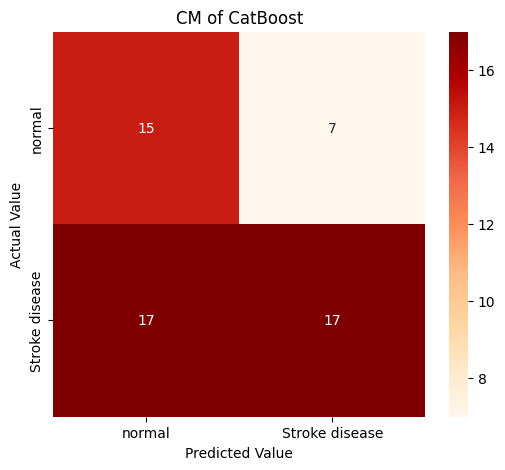

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

import seaborn as sns
cm_df=pd.DataFrame(cm,index=['normal','Stroke disease'],columns=['normal','Stroke disease'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='OrRd')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('CM of CatBoost')
plt.savefig('Eww.jpg', dpi=300)
plt.show()

In [ ]:
y_pred1 = gnb.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = dtc.predict(X_test)
y_pred4 = lr.predict(X_test)
y_pred5 = cbc.predict(X_test)
y_pred6 = ab.predict(X_test)
y_pred7 = gbm.predict(X_test)
y_pred8 = rfc.predict(X_test)
y_pred8 = rfc.predict(X_test)
y_pred9 = mlp.predict(X_test)
y_pred10 = xgb.predict(X_test)
y_pred11 = ensemble.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
#ROC AUC score calculation
RF_roc_auc1 =roc_auc_score(y_test,gnb.predict(X_test))
RF_roc_auc2 =roc_auc_score(y_test,svm.predict(X_test))
RF_roc_auc3 =roc_auc_score(y_test,dtc.predict(X_test))
RF_roc_auc4 =roc_auc_score(y_test,lr.predict(X_test))
RF_roc_auc5 =roc_auc_score(y_test,cbc.predict(X_test))
RF_roc_auc6 =roc_auc_score(y_test,ab.predict(X_test))
RF_roc_auc7 =roc_auc_score(y_test,gbm.predict(X_test))
RF_roc_auc8 =roc_auc_score(y_test,rfc.predict(X_test))
RF_roc_auc9 =roc_auc_score(y_test,mlp.predict(X_test))
RF_roc_auc10 =roc_auc_score(y_test,xgb.predict(X_test))
RF_roc_auc11 =roc_auc_score(y_test,ensemble.predict(X_test))

print("The AUC score for GNB is " + str(RF_roc_auc1))
print("The AUC score for SVM is " + str(RF_roc_auc2))
print("The AUC score for DTC is " + str(RF_roc_auc3))
print("The AUC score for LR is " + str(RF_roc_auc4))
print("The AUC score for CBC is " + str(RF_roc_auc5))
print("The AUC score for AB is " + str(RF_roc_auc6))
print("The AUC score for GBM is " + str(RF_roc_auc7))
print("The AUC score for RFC is " + str(RF_roc_auc8))
print("The AUC score for MLP is " + str(RF_roc_auc9))
print("The AUC score for XGB is " + str(RF_roc_auc10))
print("The AUC score for Ensemble is " + str(RF_roc_auc11))

The AUC score for GNB is 0.5147058823529411
The AUC score for SVM is 0.5
The AUC score for DTC is 0.47058823529411764
The AUC score for LR is 0.5668449197860963
The AUC score for CBC is 0.43181818181818177
The AUC score for AB is 0.47593582887700536
The AUC score for GBM is 0.5441176470588236
The AUC score for RFC is 0.589572192513369
The AUC score for MLP is 0.5280748663101604
The AUC score for XGB is 0.5521390374331551
The AUC score for Ensemble is 0.590909090909091


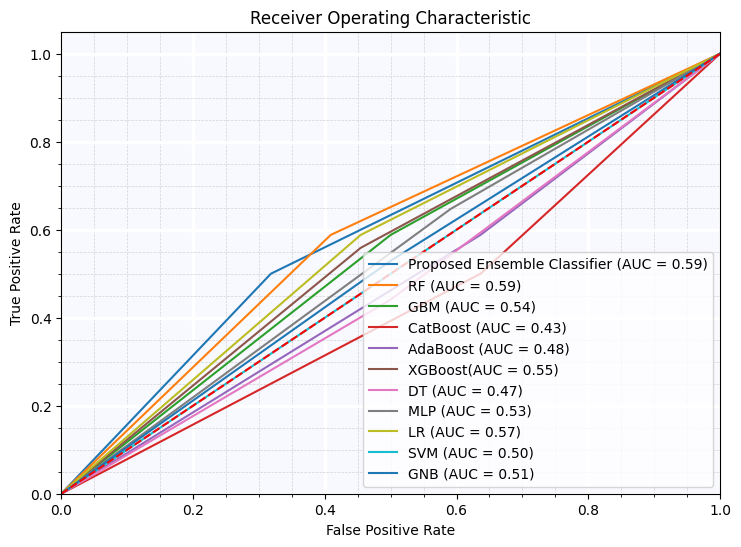

In [ ]:
from sklearn.metrics import roc_curve, auc


#1
lstm_fpr, lstm_tpr, threshold = roc_curve(y_test, y_pred11)
auc_lstm = auc(lstm_fpr, lstm_tpr)
#2
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred8)
auc_rfc = auc(rfc_fpr, rfc_tpr)
#3
gbm_fpr, gbm_tpr, threshold = roc_curve(y_test, y_pred7)
auc_gbm = auc(gbm_fpr, rfc_tpr)
#4
cbc_fpr, cbc_tpr, threshold = roc_curve(y_test, y_pred5)
auc_cbc = auc(cbc_fpr, cbc_tpr)
#5
ab_fpr, ab_tpr, threshold = roc_curve(y_test, y_pred6)
auc_ab = auc(ab_fpr, ab_tpr)
#6
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred10)
auc_xgb = auc(xgb_fpr, xgb_tpr)
#7
dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred3)
auc_dtc = auc(dtc_fpr, dtc_tpr)
#8
mlp_fpr, mlp_tpr, threshold = roc_curve(y_test, y_pred9)
auc_mlp = auc(mlp_fpr, mlp_tpr)
#9
lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred4)
auc_lr = auc(lr_fpr, lr_tpr)
#10
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred2)
auc_svm = auc(svm_fpr, svm_tpr)
#11
gnb_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred1)
auc_gnb = auc(gnb_fpr, gnb_tpr)


plt.figure(figsize=(8.5, 6))

plt.plot(lstm_fpr, lstm_tpr, linestyle='-', label='Proposed Ensemble Classifier (AUC = %0.2f)' % auc_lstm)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RF (AUC = %0.2f)' % auc_rfc)
plt.plot(gbm_fpr, gbm_tpr, linestyle='-', label='GBM (AUC = %0.2f)' % auc_gbm)
plt.plot(cbc_fpr, cbc_tpr, linestyle='-', label='CatBoost (AUC = %0.2f)' % auc_cbc)
plt.plot(ab_fpr, ab_tpr, linestyle='-', label='AdaBoost (AUC = %0.2f)' % auc_ab)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost(AUC = %0.2f)' % auc_xgb)
plt.plot(dtc_fpr, dtc_tpr, linestyle='-', label='DT (AUC = %0.2f)' % auc_dtc)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (AUC = %0.2f)' % auc_mlp)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (AUC = %0.2f)' % auc_lr)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot(gnb_fpr, gnb_tpr, linestyle='-', label='GNB (AUC = %0.2f)' % auc_gnb)


plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")

plt.grid(color='white', linestyle='-', linewidth=2.5)
plt.minorticks_on()
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('ghostwhite')


plt.legend(loc="lower right")
plt.savefig('roc_curve-2.jpg', dpi= 500)
plt.show()

In [ ]:
probs_gnb = gnb.predict_proba(X_test)[:, 1]
'''probs_svm = svm.predict_proba(xtest)[:, 1]'''
probs_dtc = dtc.predict_proba(X_test)[:, 1]
probs_lr = lr.predict_proba(X_test)[:, 1]
probs_cbc = cbc.predict_proba(X_test)[:, 1]
probs_ab = ab.predict_proba(X_test)[:, 1]
probs_gbm = gbm.predict_proba(X_test)[:, 1]
probs_rfc = rfc.predict_proba(X_test)[:, 1]
probs_mlp = mlp.predict_proba(X_test)[:, 1]
probs_xgb = xgb.predict_proba(X_test)[:, 1]
probs_lstm = ensemble.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)
#1
precision_gnb, recall_gnb, _ = precision_recall_curve(y_test_int, probs_gnb)
auc_gnb = auc(recall_gnb, precision_gnb)
#2
'''precision_svm, recall_svm, _ = precision_recall_curve(y_test_int, probs_svm)
auc_svm = auc(recall_svm, precision_svm)'''
#3
precision_dtc, recall_dtc, _ = precision_recall_curve(y_test_int, probs_dtc)
auc_dtc = auc(recall_dtc, precision_dtc)
#4
precision_lr, recall_lr, _ = precision_recall_curve(y_test_int, probs_lr)
auc_lr = auc(recall_lr, precision_lr)


precision_cbc, recall_cbc, _ = precision_recall_curve(y_test_int, probs_cbc)
auc_cbc = auc(recall_cbc, precision_cbc)

precision_ab, recall_ab, _ = precision_recall_curve(y_test_int, probs_ab)
auc_ab = auc(recall_ab, precision_ab)

precision_gbm, recall_gbm, _ = precision_recall_curve(y_test_int, probs_gbm)
auc_gbm = auc(recall_gbm, precision_gbm)

precision_rfc, recall_rfc, _ = precision_recall_curve(y_test_int, probs_rfc)
auc_rfc = auc(recall_rfc, precision_rfc)

precision_mlp, recall_mlp, _ = precision_recall_curve(y_test_int, probs_mlp)
auc_mlp = auc(recall_mlp, precision_mlp)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test_int, probs_xgb)
auc_xgb= auc(recall_xgb, precision_xgb)

precision_lstm, recall_lstm, _ = precision_recall_curve(y_test_int, probs_lstm)
auc_lstm = auc(recall_lstm, precision_lstm)

In [ ]:
print("The AUC score for GNB is " + str(auc_gnb))
print("The AUC score for SVM is " + str(auc_svm))
print("The AUC score for DTC is " + str(auc_dtc))
print("The AUC score for LR is " + str(auc_lr))
print("The AUC score for CBC is " + str(auc_cbc))
print("The AUC score for AB is " + str(auc_ab))
print("The AUC score for GBM is " + str(auc_gbm))
print("The AUC score for RFC is " + str(auc_rfc))
print("The AUC score for MLP is " + str(auc_mlp))
print("The AUC score for XGB is " + str(auc_xgb))
print("The AUC score for LSTM is " + str(auc_lstm))

The AUC score for GNB is 0.5705148042778032
The AUC score for SVM is 0.5
The AUC score for DTC is 0.6491126502986084
The AUC score for LR is 0.6490354363224358
The AUC score for CBC is 0.7119341682975928
The AUC score for AB is 0.5673292176658549
The AUC score for GBM is 0.7314973174534114
The AUC score for RFC is 0.7769261627219521
The AUC score for MLP is 0.6710395454903342
The AUC score for XGB is 0.6832004075568485
The AUC score for LSTM is 0.7434302800648768


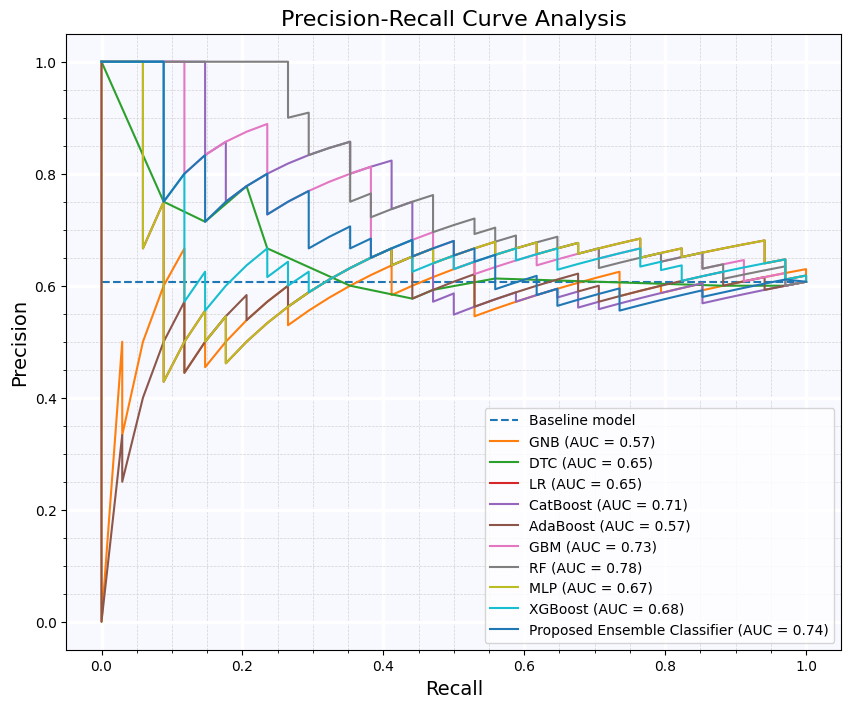

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')

plt.plot(recall_gnb, precision_gnb, label=f'GNB (AUC = %0.2f)' % auc_gnb)
'''plt.plot(recall_svm, precision_svm, label=f'AUC (Decision Tree) = {auc_svm:.2f}')'''
plt.plot(recall_dtc, precision_dtc, label=f'DTC (AUC = %0.2f)' % auc_dtc)
plt.plot(recall_lr, precision_lr, label=f'LR (AUC = %0.2f)' % auc_lr)
plt.plot(recall_cbc, precision_cbc, label=f'CatBoost (AUC = %0.2f)' % auc_cbc)
plt.plot(recall_ab, precision_ab, label=f'AdaBoost (AUC = %0.2f)' % auc_ab)
plt.plot(recall_gbm, precision_gbm, label=f'GBM (AUC = %0.2f)' % auc_gbm)
plt.plot(recall_rfc, precision_rfc, label=f'RF (AUC = %0.2f)' % auc_rfc)
plt.plot(recall_lr, precision_lr, label=f'MLP (AUC = %0.2f)' % auc_mlp)
plt.plot(recall_mlp, precision_mlp, label=f'XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot(recall_xgb, precision_xgb, label=f'Proposed Ensemble Classifier (AUC = %0.2f)' % auc_lstm)


plt.title('Precision-Recall Curve Analysis', size=16)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.grid(color='white', linestyle='-', linewidth=2.5)
plt.minorticks_on()
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('ghostwhite')
plt.legend()
plt.savefig('prc_curve-2.jpg', dpi= 500)

#SHAP

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# %% Create SHAP explainer
explainer = shap.Explainer(cbc)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender,age,height,Weight,ever_married,work_type,Residence_type,smoking_status,physActivity,Fruits,Veggies,HvyAlcoholConsump,avg_glucose_level,HighBP,long_time_sitting,HighChol,CholCheck,BMI,obese
299,1,57,1.727203,78,1,2,0,0,1,1,1,0,7.0,0,1,0,0,26.146141,0


In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(19,)


array([[ 0.00000000e+00,  5.62813817e-02,  1.17195967e-01,
        -1.94391424e-02,  0.00000000e+00, -1.55040209e-01,
         1.32337361e-01,  3.44767367e-02, -8.45183026e-03,
         3.06324719e-04,  8.96157747e-03, -3.16412277e-04,
         6.95292839e-02, -3.77353791e-02, -4.17106689e-02,
         3.08241483e-01,  5.13312897e-02, -1.99700247e-02,
         0.00000000e+00]])

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rfc.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 1


IndexError: invalid index to scalar variable.

In [ ]:
# %% >> Visualize global features
# Feature summary

shap.summary_plot(shap_values, X_test)

plt.savefig('shap.png', dpi=400)

#Feature Importance

In [ ]:
'''importances1 = gnb.feature_importances_'''
'''importances2 = svm.feature_importances_'''
importances3 = dtc.feature_importances_
'''importances4 = lr.feature_importances_'''
importances5 = cbc.feature_importances_
importances6 = ab.feature_importances_
importances7 = gbm.feature_importances_
importances8 = rfc.feature_importances_
'''importances9 = mlp.feature_importances_'''
importances10 = xgb.feature_importances_
'''importances11 = ensemble.feature_importances_'''

In [ ]:
'''for feature, importance in zip(X.columns, importances1):
    print('{}: {}'.format(feature, importance))'''

In [ ]:
'''plt.bar(X.columns, importances1)
plt.xticks(rotation=90)
plt.show()'''

In [ ]:
'''for feature, importance in zip(X.columns, importances2):
    print('{}: {}'.format(feature, importance))'''

In [ ]:
'''plt.bar(X.columns, importances2)
plt.xticks(rotation=90)
plt.show()'''

In [ ]:
for feature, importance in zip(X.columns, importances3):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances3)
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''for feature, importance in zip(X.columns, importances4):
    print('{}: {}'.format(feature, importance))'''

In [ ]:
'''plt.bar(X.columns, importances4)
plt.xticks(rotation=90)
plt.show()'''

In [ ]:
for feature, importance in zip(X.columns, importances5):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
for feature, importance in zip(X.columns, importances6):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
for feature, importance in zip(X.columns, importances7):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances7)
plt.xticks(rotation=90)
plt.show()

In [ ]:
for feature, importance in zip(X.columns, importances8):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''for feature, importance in zip(X.columns, importances9):
    print('{}: {}'.format(feature, importance))'''

In [ ]:
'''plt.bar(X.columns, importances9)
plt.xticks(rotation=90)
plt.show()'''

In [ ]:
for feature, importance in zip(X.columns, importances10):
    print('{}: {}'.format(feature, importance))

In [ ]:
plt.bar(X.columns, importances10)
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''for feature, importance in zip(X.columns, importances11):
    print('{}: {}'.format(feature, importance))'''

In [ ]:
'''plt.bar(X.columns, importances11)
plt.xticks(rotation=90)
plt.show()'''